In [1]:
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
import seaborn as sns
from matplotlib.ticker import PercentFormatter

# funções desenvolvidas para o projeto
from src.config import DADOS_TRATADOS
from src.auxiliares import grafico_boxplot_histograma

In [2]:
df = pd.read_parquet(DADOS_TRATADOS)
df.head()

,tempo_passado_sozinho,medo_de_palco,part_eventos_sociais,sair_de_casa,esgotado_apos_socializar,tamanho_circulo_amizade,freq_post,personalidade
0,4,Não,4,6,Não,13,5,Extrovertido
1,9,Sim,0,0,Sim,0,3,Introvertido
2,9,Sim,1,2,Sim,5,2,Introvertido
3,0,Não,6,7,Não,14,8,Extrovertido
4,3,Não,9,4,Não,8,5,Extrovertido


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2477 entries, 0 to 2476
Data columns (total 8 columns):
 #   Column                    Non-Null Count  Dtype   
---  ------                    --------------  -----   
 0   tempo_passado_sozinho     2477 non-null   int8    
 1   medo_de_palco             2477 non-null   category
 2   part_eventos_sociais      2477 non-null   int8    
 3   sair_de_casa              2477 non-null   int8    
 4   esgotado_apos_socializar  2477 non-null   category
 5   tamanho_circulo_amizade   2477 non-null   int8    
 6   freq_post                 2477 non-null   int8    
 7   personalidade             2477 non-null   category
dtypes: category(3), int8(5)
memory usage: 19.8 KB


In [4]:
coluna_alvo = 'personalidade'

colunas_numericas = df.select_dtypes(include="number").columns.to_list()

colunas_categoricas = df.select_dtypes(include="category").columns.to_list()
colunas_categoricas.remove(coluna_alvo)


In [5]:
print(coluna_alvo)
print(colunas_categoricas)
print(colunas_numericas)

personalidade
['medo_de_palco', 'esgotado_apos_socializar']
['tempo_passado_sozinho', 'part_eventos_sociais', 'sair_de_casa', 'tamanho_circulo_amizade', 'freq_post']


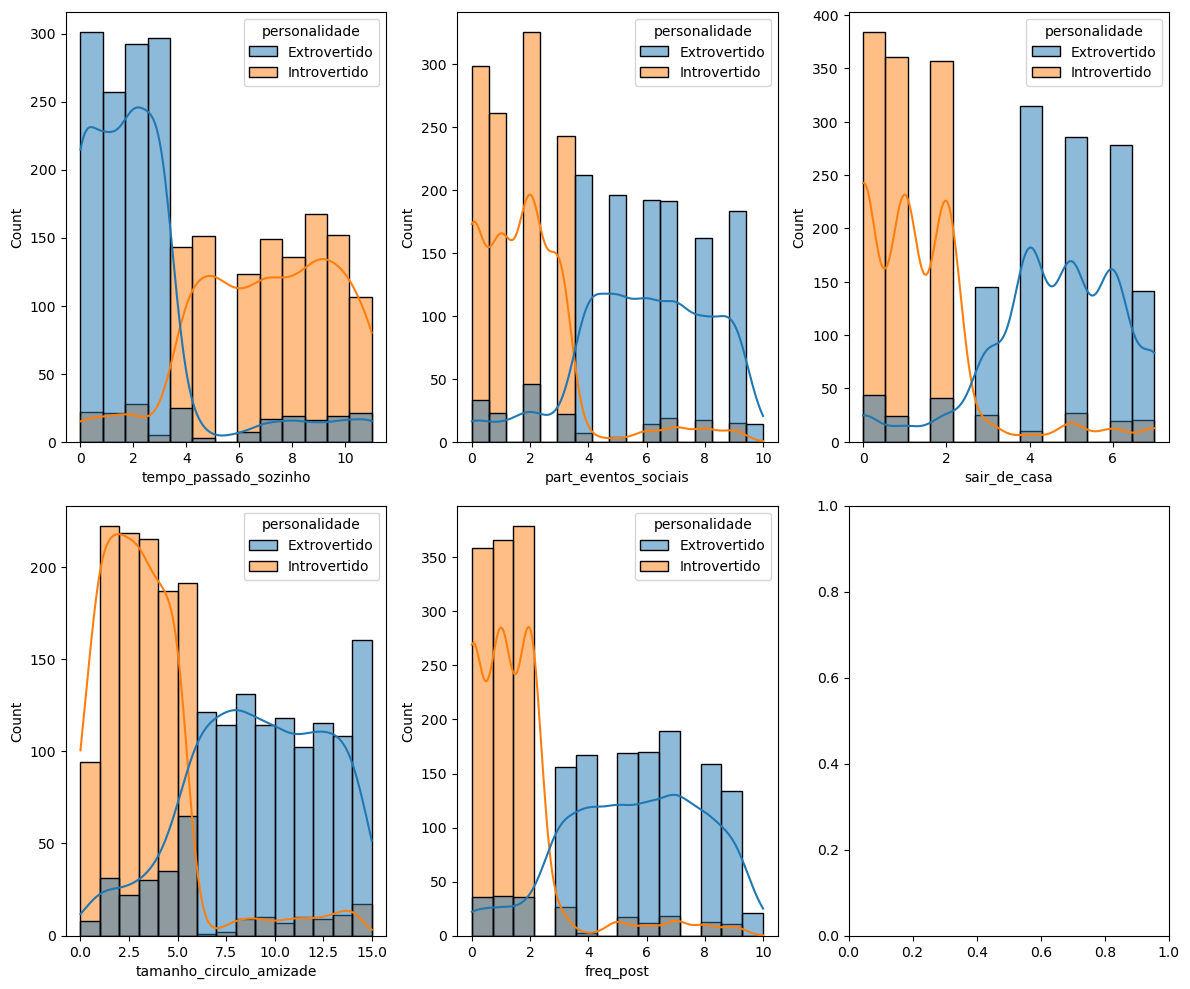

In [6]:
fig, axs = plt.subplots(nrows=2, ncols=3, figsize=(12, 10))

axs = axs.flatten()

for ax, coluna in zip(axs, colunas_numericas):
    sns.histplot(data=df, x=coluna, kde=True, hue=coluna_alvo, ax=ax)

plt.tight_layout()
plt.show()

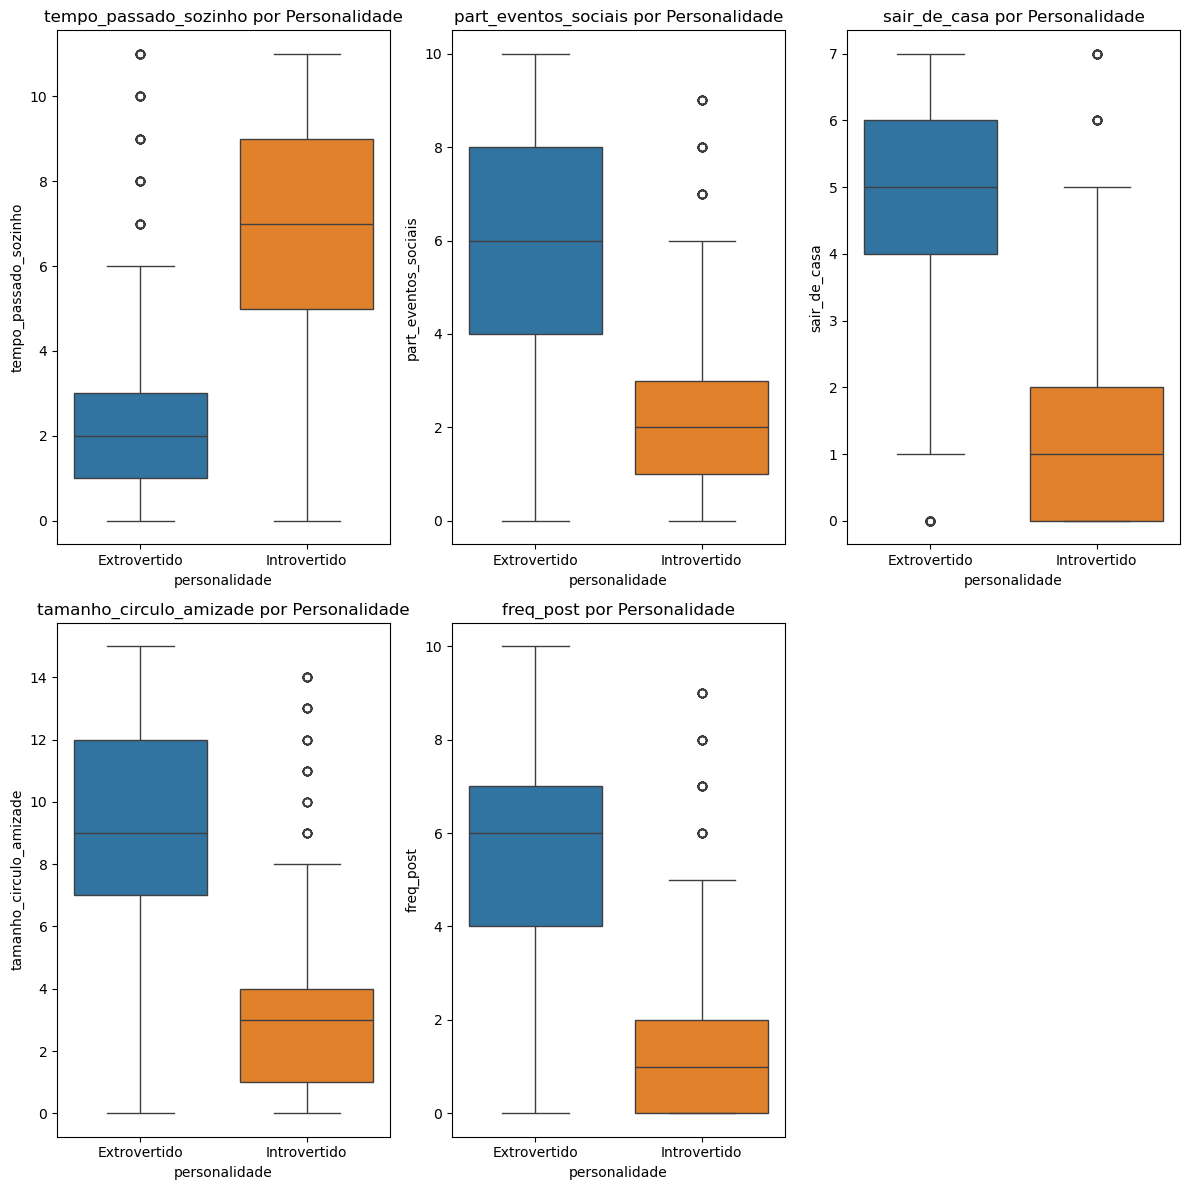

In [7]:
plt.figure(figsize=(12, 12))
for i, coluna in enumerate(colunas_numericas, 1):
    plt.subplot(2, 3, i)
    sns.boxplot(data=df, 
                x=coluna_alvo, 
                y=coluna, 
                hue=coluna_alvo,
                 )
    plt.title(f'{coluna} por Personalidade')
plt.tight_layout()

## Insights:

Tempo sozinho:
O tempo passado sozinho das pessoas classificadas como extrovertidas é, em sua maioria, bem menor que o tempo das pessoas classificadas como introvertidas.
O gráfico mostra que a maior parte das pessoas extrovertidas passam até no máximo 3 horas sozinhas. Já os introvertidos possuem o comportamento contrário, a maioria dos introvertidos passam mais que 3 horas do dia sozinhos.

Participação em Eventos Sociais:
O histograma nos mostra que os introvertidos participam de uma quantidade menor de eventos sociais, diferentemente dos extrovertidos que em sua maioria participam com maior frequencia de tais eventos. O ponto de inflexão de ambos tem valor 4, ou seja, introvertidos classificam participações em eventos sociais em até 4, enquanto extrovertidos classificam as mesmas com pelo menos 4.

Sair de Casa:
De maneira semelhante se comporta o gráfico que classifica o quanto cada indivíduo sai de casa. Os introvertidos têm com maior frequência o hábito de sair menos de casa que os extrovertidos. 

Tamanho do circulo de amizade:
O gráfico nos mostra também que o circulo de amizades dos dois tipos de personalidades se comportam de maneiras opostas, indicando que pessoas classificadas como extrovertidas em sua maioria possuem mais pessoas no seu círculo de amizades que os introvertidos.

Frequencia de postagens:
Introvertidos possui o comportamentos de postar com menor frequencia nas redes sociais que os extrovertidos, como mostrado no histograma.

Em resumo:
- Introvertidos:
    - Passam mais tempo sozinhos;
    - Participam com menor frequencia de Eventos Sociais;
    - Têm o comportamento de sair com menor frequencia de casa;
    - Possuem, em sua maioria, um círculo de amizades menor;
    - Têm o costume de postar menos em redes sociais.

- Extrovertidos:
    - Em sua maioria passam em sua maioria somente 3 horas sozinhos;
    - Participam mais de Eventos Sociais;
    - Possuem o hábito de sair mais de casa;
    - Possuem mais pessoas em seu Círculo de amizades;
    - Frequência maior de posts.


## Variáveis Categóricas

#### - Binárias

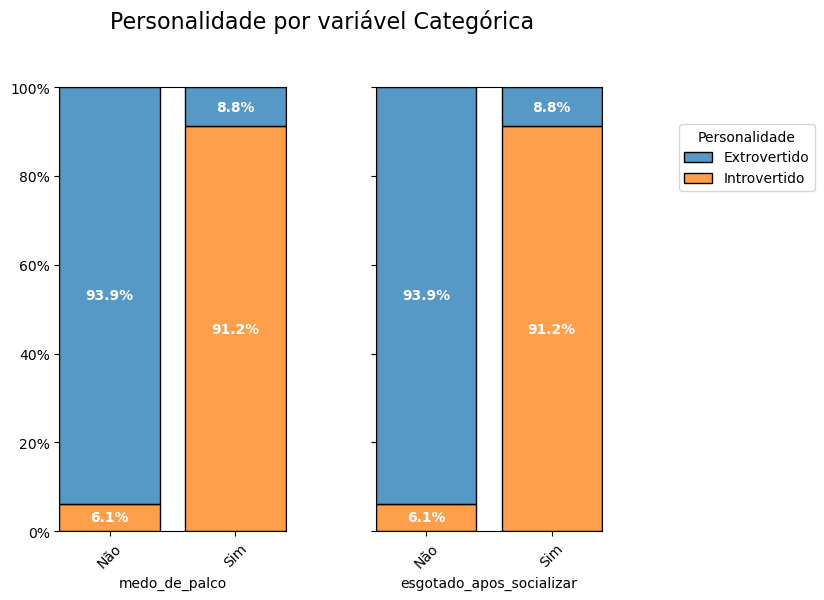

In [8]:
fig, axs = plt.subplots(nrows=1, ncols=2, figsize=(7, 6), sharey=True)

for i, coluna in enumerate(colunas_categoricas):
    h = sns.histplot(x=coluna, 
                     hue=coluna_alvo, 
                     data=df, 
                     multiple='fill', 
                     ax=axs.flat[i], 
                     stat='percent', 
                     shrink=0.8)
    
    h.tick_params(axis='x', 
                  labelrotation=45)
    h.yaxis.set_major_formatter(PercentFormatter(1))
    h.set_ylabel('')
    for bar in h.containers:
        h.bar_label(bar, 
                    label_type='center', 
                    labels=[f'{b.get_height():.1%}' for b in bar], 
                    color='White', 
                    weight='bold')

    legend = h.get_legend()
    legend.remove()

labels = [text.get_text() for text in legend.get_texts()]

fig.legend(handles=legend.legend_handles, 
           labels=labels, 
           loc='upper left', 
           ncols=1, 
           title='Personalidade', 
           bbox_to_anchor=(1, 0.8))

fig.suptitle('Personalidade por variável Categórica', fontsize=16)

fig.align_labels()

plt.subplots_adjust(wspace=0.4, hspace=1.8, top=0.85)

plt.show()

Os dois espectros de personalidade possuem comportamentos distintos quando se tratam das variáveis categóricas "Medo de Palco" e "Esgotado após Socializar".
- 91,20% dos Introvertidos têm medo de Palco e se sentem esgotados após socializarem-se;
- Quase 94% dos Extrovertidos afirmam não sentir medo de palco e não ficam esgotados após períodos de socialização.
